In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Paramètrage géométrique

La position du point $F=(x,y)$ est donnée par le système d'équation suivant :
$$
\left\{
\begin{array}{l}
L^2 = x^2  +a^2+\ell^2  -2xa -2x\ell\cos\theta_d+2a\ell\cos\theta_d  +  y^2 - 2y \ell   \sin\theta_d  \\
L^2 = x^2  +a^2+\ell^2 +2xa -2x\ell\cos\theta_g-2a\ell\cos\theta_g  +  y^2  -2y  \ell   \sin\theta_g 
\end{array}
\right. .
$$ 


In [2]:
L = 350 # mm
l = 170 # mm
a = 60  # mm

sol_ini = [0,-300]
theta_g_0 = np.radians(-90-30)
theta_g_f = np.radians(-90-30-60)

theta_d_0 = np.radians(-90+30)
theta_d_f = np.radians(-90+30+60)

les_theta_g = np.linspace(theta_g_0,theta_g_f,100)
les_theta_d = np.linspace(theta_d_0,theta_d_f,100)


### Affichage des angles

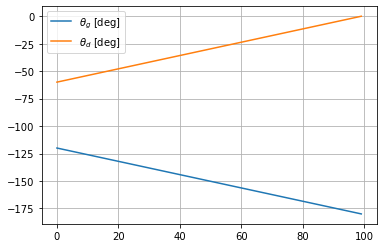

In [3]:
plt.plot(np.degrees(les_theta_g),label = "$\\theta_g$ [deg]")
plt.plot(np.degrees(les_theta_d),label = "$\\theta_d$ [deg]")
plt.grid()
plt.legend()

### Mouvement des points $D$ et $E$
On $\overrightarrow{OE} = -a\overrightarrow{x_0}+\ell \overrightarrow{x_1'} = -a\overrightarrow{x_0}+\ell \left(\cos\theta_g'\overrightarrow{x_0} +\sin\theta_g'\overrightarrow{y_0} \right)$

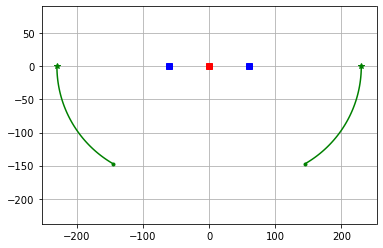

In [4]:
def calc_E(theta_g):
    xE = -a +l*np.cos(theta_g)
    yE = l*np.sin(theta_g)
    return (xE,yE)
def calc_D(theta_d):
    xD = a +l*np.cos(theta_d)
    yD = l*np.sin(theta_d)
    return (xD,yD)
les_xE = [calc_E(t)[0] for t in les_theta_g]
les_yE = [calc_E(t)[1] for t in les_theta_g]

les_xD = [calc_D(t)[0] for t in les_theta_d]
les_yD = [calc_D(t)[1] for t in les_theta_d]

plt.plot(les_xE,les_yE,"g")
plt.plot(les_xD,les_yD,"g")
plt.plot([0],[0],"rs")
plt.plot([-a],[0],"bs")
plt.plot([a],[0],"bs")

plt.plot(les_xE[0],les_yE[0],"g.")
plt.plot(les_xE[-1],les_yE[-1],"g*")
plt.plot(les_xD[0],les_yD[0],"g.")
plt.plot(les_xD[-1],les_yD[-1],"g*")
plt.axis("equal")
plt.grid()
plt.show()

In [5]:
def f(y):
    xnum = a*l*(np.cos(theta_d)+np.cos(theta_g)) + y*l*(np.sin(theta_g) -np.sin(theta_d))
    xden = 2*a -l*(- np.cos(theta_d)+ np.cos(theta_g))
    x = xnum/xden
    return x**2 + a**2 + l**2 - 2*x*a -2*x*l*np.cos(theta_d)+2*a*l*np.cos(theta_d) + y**2 -2*y*l*np.sin(theta_d) -L**2

def calc_x(y) :
    xnum = a*l*(np.cos(theta_d)+np.cos(theta_g)) + y*l*(np.sin(theta_g) -np.sin(theta_d))
    xden = 2*a -l*(- np.cos(theta_d)+ np.cos(theta_g))
    x = xnum/xden
    return x

def solve_directe():
    les_x = []
    les_y = []
    sol_ini = -200
    for i in range(len(les_theta_g)):
        global theta_d,theta_g
        theta_d = les_theta_d[i]
        theta_g = les_theta_g[i]
        sol = fsolve(f,sol_ini)
        sol_ini = sol[0]
        les_y.append(sol[0])
        les_x.append(calc_x(sol_ini))
        
    return les_x,les_y

les_xF,les_yF = solve_directe()


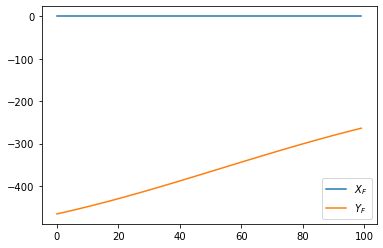

In [6]:
plt.plot(les_xF,label="$X_F$")
plt.plot(les_yF,label="$Y_F$")
plt.legend()

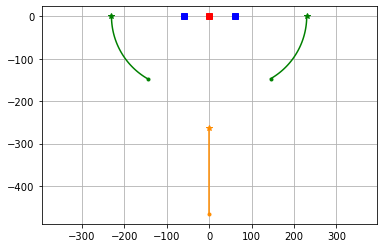

In [7]:
plt.plot(les_xE,les_yE,"g")
plt.plot(les_xD,les_yD,"g")
plt.plot([0],[0],"rs")
plt.plot([-a],[0],"bs")
plt.plot([a],[0],"bs")

plt.plot(les_xE[0],les_yE[0],"g.")
plt.plot(les_xE[-1],les_yE[-1],"g*")
plt.plot(les_xD[0],les_yD[0],"g.")
plt.plot(les_xD[-1],les_yD[-1],"g*")

plt.plot(les_xF,les_yF,"darkorange")
plt.plot(les_xF[0],les_yF[0],".",color="darkorange")
plt.plot(les_xF[-1],les_yF[-1],"*",color="darkorange")

plt.axis("equal")
plt.grid()
plt.show()

